# Training the AI model

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Load the data

In [23]:
# load the data
data = pd.read_csv('../data/clean_data.csv')

In [24]:
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068.000000,0.002400,0.1700,16.12,0.0,red,M
1,3042.000000,0.000500,0.1542,16.60,0.0,red,M
2,2600.000000,0.000300,0.1020,18.70,0.0,red,M
3,2800.000000,0.000200,0.1600,16.65,0.0,red,M
4,10467.934498,0.000138,0.1030,20.06,0.0,red,M


In [25]:
# encode the target variable
le_class = LabelEncoder()
le_color = LabelEncoder()
data['Spectral Class'] = le_class.fit_transform(data['Spectral Class'])
data['Star color'] = le_color.fit_transform(data['Star color'])

In [26]:
# save the encoders
import pickle
with open('../models/LabEnc_class.pkl', 'wb') as f:
    pickle.dump(le_class, f)
with open('../models/LabEnc_color.pkl', 'wb') as f:
    pickle.dump(le_color, f)

In [27]:
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068.000000,0.002400,0.1700,16.12,0.0,5,4
1,3042.000000,0.000500,0.1542,16.60,0.0,5,4
2,2600.000000,0.000300,0.1020,18.70,0.0,5,4
3,2800.000000,0.000200,0.1600,16.65,0.0,5,4
4,10467.934498,0.000138,0.1030,20.06,0.0,5,4


### Normalize the data

In [28]:
# normalize the data except the target variable
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,-0.792906,-0.620127,-0.456322,1.137424,-1.481223,0.563167,4
1,-0.795686,-0.620127,-0.456353,1.184043,-1.481223,0.563167,4
2,-0.842950,-0.620127,-0.456459,1.388002,-1.481223,0.563167,4
3,-0.821563,-0.620127,-0.456342,1.188899,-1.481223,0.563167,4
4,-0.001619,-0.620127,-0.456457,1.520090,-1.481223,0.563167,4


In [29]:
data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
count,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,239.000000
mean,-4.459473e-17,7.432455e-17,-4.459473e-17,-1.486491e-17,-2.155412e-16,5.945964e-17,3.142259
std,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.605091
min,-8.429497e-01,-6.201274e-01,-4.566470e-01,-1.585918e+00,-1.481223e+00,-1.280626e+00,0.000000
25%,-7.593291e-01,-6.201274e-01,-4.564575e-01,-1.031538e+00,-8.825535e-01,-9.118677e-01,1.000000
50%,-3.617574e-01,-6.201227e-01,-4.548515e-01,2.633113e-02,6.300516e-03,5.631670e-01,4.000000
75%,3.945165e-01,5.002479e-01,-3.368382e-01,8.824745e-01,9.134545e-01,5.631670e-01,4.000000
max,3.156293e+00,4.260227e+00,3.467376e+00,1.520090e+00,1.512124e+00,2.775719e+00,5.000000


### Split the data into training and test sets

In [30]:
# split the data into train and test
X = data.drop(['Spectral Class'], axis=1)
y = data['Spectral Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create a Logistic Regression model

In [31]:
LR_model = LogisticRegression(multi_class='multinomial', solver='newton-cg', verbose = 1, max_iter = 1000)

### Train the model

In [32]:
LR_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg',
                   verbose=1)

### Evaluate the model

In [33]:
print('Train score:', LR_model.score(X_train, y_train))
print('Test score:', LR_model.score(X_test, y_test))

Train score: 0.806282722513089
Test score: 0.7916666666666666


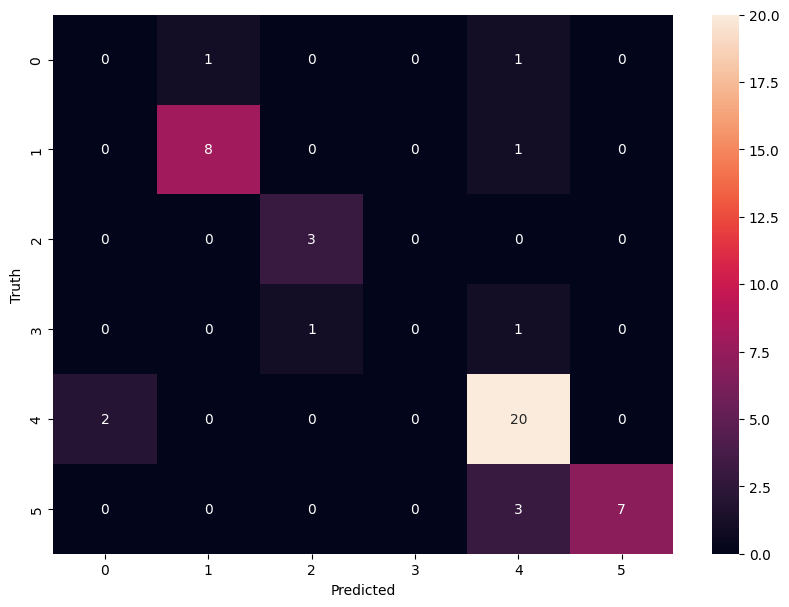

In [34]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = LR_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Save the model

In [35]:
# save the model
import joblib
joblib.dump(LR_model, '../models/LogisticRegression_model.pkl')

['../models/LogisticRegression_model.pkl']